In [1]:
import numpy as np
import pandas as pd
import seaborn as sb

In [2]:
df=pd.read_csv('cardio_train.csv')
df.head(10)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
5,8,21914,1,151,67.0,120,80,2,2,0,0,0,0
6,9,22113,1,157,93.0,130,80,3,1,0,0,1,0
7,12,22584,2,178,95.0,130,90,3,3,0,0,1,1
8,13,17668,1,158,71.0,110,70,1,1,0,0,1,0
9,14,19834,1,164,68.0,110,60,1,1,0,0,0,0


In [4]:
df.corr()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,1.000000,0.003457,0.003502,-0.003038,-0.001830,0.003356,-0.002529,0.006106,0.002467,-0.003699,0.001210,0.003755,0.003799
age,0.003457,1.000000,-0.022811,-0.081515,0.053684,0.020764,0.017647,0.154424,0.098703,-0.047633,-0.029723,-0.009927,0.238159
gender,0.003502,-0.022811,1.000000,0.499033,0.155406,0.006005,0.015254,-0.035821,-0.020491,0.338135,0.170966,0.005866,0.008109
height,-0.003038,-0.081515,0.499033,1.000000,0.290968,0.005488,0.006150,-0.050226,-0.018595,0.187989,0.094419,-0.006570,-0.010821
weight,-0.001830,0.053684,0.155406,0.290968,1.000000,0.030702,0.043710,0.141768,0.106857,0.067780,0.067113,-0.016867,0.181660
ap_hi,0.003356,0.020764,0.006005,0.005488,0.030702,1.000000,0.016086,0.023778,0.011841,-0.000922,0.001408,-0.000033,0.054475
ap_lo,-0.002529,0.017647,0.015254,0.006150,0.043710,0.016086,1.000000,0.024019,0.010806,0.005186,0.010601,0.004780,0.065719
cholesterol,0.006106,0.154424,-0.035821,-0.050226,0.141768,0.023778,0.024019,1.000000,0.451578,0.010354,0.035760,0.009911,0.221147
gluc,0.002467,0.098703,-0.020491,-0.018595,0.106857,0.011841,0.010806,0.451578,1.000000,-0.004756,0.011246,-0.006770,0.089307
smoke,-0.003699,-0.047633,0.338135,0.187989,0.067780,-0.000922,0.005186,0.010354,-0.004756,1.000000,0.340094,0.025858,-0.015486


<Axes: >

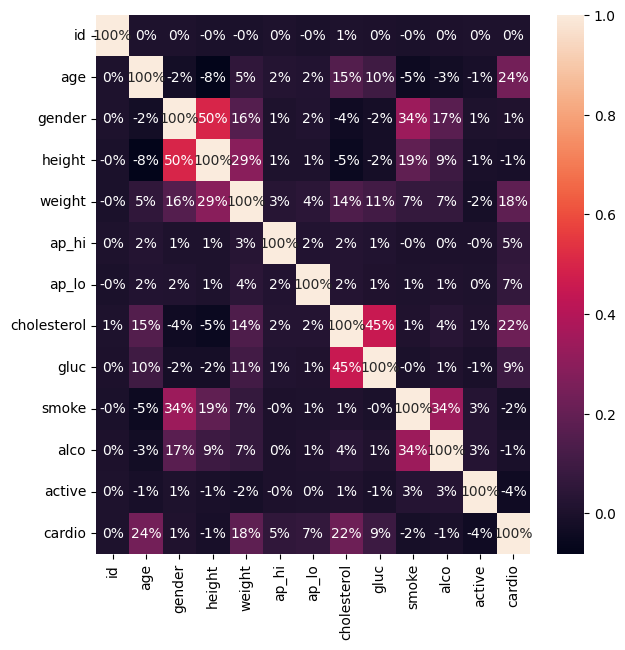

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7,7))
sb.heatmap(df.corr(),annot=True,fmt='.0%')

In [6]:
#split data into target and feature data
X=df.iloc[:,:-1].values
Y=df.iloc[:,-1].values
print(X)

[[0.0000e+00 1.8393e+04 2.0000e+00 ... 0.0000e+00 0.0000e+00 1.0000e+00]
 [1.0000e+00 2.0228e+04 1.0000e+00 ... 0.0000e+00 0.0000e+00 1.0000e+00]
 [2.0000e+00 1.8857e+04 1.0000e+00 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 ...
 [9.9996e+04 1.9066e+04 2.0000e+00 ... 0.0000e+00 1.0000e+00 0.0000e+00]
 [9.9998e+04 2.2431e+04 1.0000e+00 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 [9.9999e+04 2.0540e+04 1.0000e+00 ... 0.0000e+00 0.0000e+00 1.0000e+00]]


In [7]:
#split the target data into 75% training and 25% testing
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.25,random_state=1)

In [8]:
#normalizing the data or feature scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)


In [9]:
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=1)
forest.fit(X_train,Y_train)


RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=1)

In [10]:
model=forest
model.score(X_train,Y_train)

0.9824

In [11]:
#accuracy of model on test datasets
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,model.predict(X_test))

print(cm)
print("end")

[[20441  5813]
 [ 9672 16574]]
end
